# Monday, March 24th

- If you've not already done so, please send me an email if you plan to make edits to Project 2 or 3 based on feedback on Project 1.
- I've also pushed back the Tartans to Sunday night.
- We will start by looking at Projects 2, 3, 4 to answer questions you may have.

## Thoughts on tartans project:

### Padding out your tartan

Recall: your final tartan should be a `500` by `500` (by `3`) array. You will need to think about how to repeat your pattern to reach the desired size.

One strategy: duplicate your assigned pattern sufficiently many times to exceed the desired tartan size.

In [1]:
[1,2,3,4] * 5

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

Once we have a pattern that exceeds the desired tartan size, we can take a slice of the generated tartan that has the correct size:

In [ ]:
generated_tartan[:500, :500]

Another strategy is to user modular division to iterate through your pattern until you've filled a `500` by `500` (by `3` array):

In [2]:
my_list = ['a','b','c','d','e','f','g']

In [5]:
for i in range(10):
    letter = my_list[i % len(my_list)]
    print(letter)

a
b
c
d
e
f
g
a
b
c


### Generating the authentic tartan pattern

You will need to work out how to generate the authentic tartan pattern.

For the checkerboard pattern, we could use four `if`/`elif`/`else` statements to decide whether to pull from the horizontal or vertical stripes:

In [ ]:
if i % 2 == 0 and j % 2 == 0:
    tartan[i,j] = horizontal_stripes[i,j]
elif i % 2 == 0 and j % 2 == 1:
    tartan[i,j] = vertical_stripes[i,j]
elif i % 2 == 1 and j % 2 == 0:
    tartan[i,j] = vertical_stripes[i,j]
else:
    tartan[i,j] = horizontal_stripes[i,j]

We could do the same for the authentic pattern, but we'd have sixteen `if`/`elif`/`else` statements.

In [ ]:
if i % 4 == 0 and j % 4 == 0:
    tartan[i,j] = horizontal_stripes[i,j]
elif i % 4 == 0 and j % 4 == 1:
    tartan[i,j] = horizontal_stripes[i,j]
elif i % 4 == 0 and j % 4 == 2:
    tartan[i,j] = vertical_stripes[i,j]
...
...

$1 / \left(\frac{1}{4}\right)$

$\frac{1}{\frac{1}{4}}$

In [8]:
import matplotlib.pyplot as plt
import numpy as np

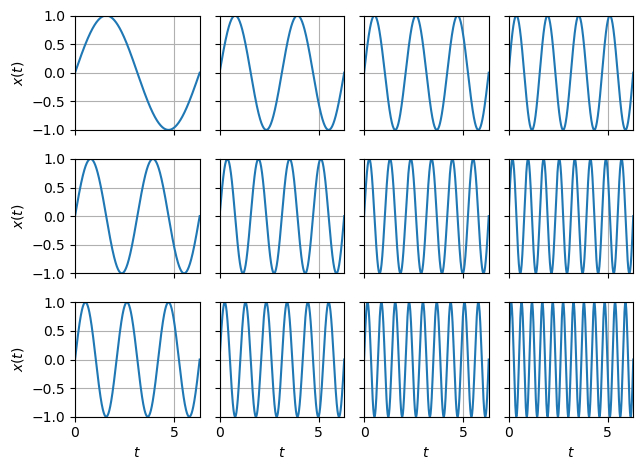

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4)

t = np.linspace(0,2*np.pi,1000)

for i in range(3):
    for j in range(4):
        ax = axes[i,j]
        ax.plot(t,np.sin((i+1)*(j+1)*t))
        ax.grid()
        ax.set_xlim((0,2*np.pi))
        ax.set_ylim((-1,1))
        
for ax in axes[:,0]:
    ax.set_ylabel('$x(t)$')
for ax in axes[-1,:]:
    ax.set_xlabel('$t$')
for ax in axes[:,1:].flatten():
    ax.set_yticklabels([])
for ax in axes[:-1,:].flatten():
    ax.set_xticklabels([])
        
fig.tight_layout()

In [ ]:
%matplotlib inline

## A little more on working with strings:

In [31]:
s = 'This is a string.'

In [32]:
s.split('is')

['Th', ' ', ' a string.']

In [33]:
list_of_strings = ['Hello', 'my name is','Jon']

'1234'.join(list_of_strings)

'Hello1234my name is1234Jon'

We can also use the `.replace` method to substitute a string for a substring:

In [34]:
print(s)

This is a string.


In [36]:
s.replace('is', '!!Hello!!')

'Th!!Hello!! !!Hello!! a string.'